# Dataset

In [ ]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv

--2022-09-27 01:50:35--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4649304 (4.4M) [text/plain]
Saving to: ‘re8.csv’

re8.csv             100%[===================>]   4.43M  --.-KB/s    in 0.01s   

2022-09-27 01:50:37 (302 MB/s) - ‘re8.csv’ saved [4649304/4649304]



In [ ]:
# Importando manualemnte as bibliotecas necessarias pybind11 e graph-walker
!pip install pybind11
!pip install graph-walker
!pip install git+https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git@transductive-inductive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 213 kB 32.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for graph-walker: filename=graph_walker-1.0.6-cp37-cp37m-linux_x86_64.whl size=1009651 sha256=6e8f4471d861137d16e362ccbc3a3cfdae6ab4939cab3aa2cf4b8f71c69634e5
  Stored in directory: /root/.cache/pip/wheels/1c/8e/23/fd6bb153064bb1f549a21a8ffef720aba09f01d4ae43866c5e
Successfully built graph-walker
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git (to revision transductive-inductive) to /tmp/pip-req-build-ie822xzu
  Running command git clone -q https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git /tmp/pip-req-build-ie822xzu
  Running command git checkout -b transductive-inductive --track origi

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def evaluate(df_embed, labels):
    # avaliando com clustering
    # kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(df_emb_train)
    # kmeans.labels_
    # print('---> DeepWalk Transformers (clustering): ', normalized_mutual_info_score(kmeans.labels_, labels))

    # avaliando com classificacao
    print("\n\n\n---> DeepWalk Transformers (classification)")
    clf_train, clf_test, clf_train_y, clf_test_y  = train_test_split(df_embed, labels, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(clf_train, clf_train_y)
    print(classification_report(clf_test_y, clf.predict(clf_test)))

In [ ]:
import pandas as pd 

df = pd.read_csv('re8.csv')
df

,file_name,text,class
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq
4,acq.6302.txt,cooper canada said it received takeover offers...,acq
...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade


In [ ]:
df['label'] = df['class'].astype('category').cat.codes
df

,file_name,text,class,label
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq,0
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq,0
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq,0
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq,0
4,acq.6302.txt,cooper canada said it received takeover offers...,acq,0
...,...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade,7
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade,7
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade,7
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade,7


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,file_name,text,class,label
0,interest.8060.txt,manufacturers hanover raises prime rate to pct...,interest,4
1,earn.7162.txt,plains resources inc plns year loss oper shr l...,earn,2
2,earn.1005.txt,bowater pretax profits rise mln stg shr p vs p...,earn,2
3,earn.4828.txt,k mart corp km th qtr jan net shr dlrs vs nine...,earn,2
4,acq.7244.txt,cross and trecker ctco buys automation unit cr...,acq,0
...,...,...,...,...
7669,earn.1610.txt,mark iv industries inc iv th qtr feb net shr c...,earn,2
7670,acq.1960.txt,dresser industries inc to sell reliance standa...,acq,0
7671,earn.8231.txt,bankamerica says it expects to report a profit...,earn,2
7672,earn.4008.txt,quartz engineering and materials qrtz st qtr q...,earn,2


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


embeddings = model.encode(df.text.to_list())


In [ ]:
df['embeddings'] = list(embeddings)
df

,file_name,text,class,label,embeddings
0,interest.8060.txt,manufacturers hanover raises prime rate to pct...,interest,4,"[0.18047659, 0.054866698, -0.17309445, -0.0793..."
1,earn.7162.txt,plains resources inc plns year loss oper shr l...,earn,2,"[-0.41636795, -0.28153813, 0.3372412, 0.198546..."
2,earn.1005.txt,bowater pretax profits rise mln stg shr p vs p...,earn,2,"[-0.1106405, -0.3601423, 0.119532526, 0.118693..."
3,earn.4828.txt,k mart corp km th qtr jan net shr dlrs vs nine...,earn,2,"[-0.23541678, -0.22261766, 0.18609327, 0.03702..."
4,acq.7244.txt,cross and trecker ctco buys automation unit cr...,acq,0,"[-0.5418358, -0.47537577, -0.16464068, -0.1087..."
...,...,...,...,...,...
7669,earn.1610.txt,mark iv industries inc iv th qtr feb net shr c...,earn,2,"[-0.26570106, -0.094836526, 0.25246245, -0.088..."
7670,acq.1960.txt,dresser industries inc to sell reliance standa...,acq,0,"[-0.23070066, -0.11237226, -0.30124414, 0.2537..."
7671,earn.8231.txt,bankamerica says it expects to report a profit...,earn,2,"[0.00041876634, -0.4683203, -0.4928435, 0.3928..."
7672,earn.4008.txt,quartz engineering and materials qrtz st qtr q...,earn,2,"[-0.84322715, 0.3820039, 0.2672522, 0.42805243..."


# Construindo o Grafo

In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
A = kneighbors_graph(np.array(df['embeddings'].to_list()), n_neighbors=5, metric="cosine")

In [ ]:
import networkx as nx 
G = nx.Graph(A)

In [ ]:
G.number_of_nodes()

7674

# Pegando uma amostra do grafo usando Edge Sampling

In [ ]:
max_size = G.number_of_nodes() // 1.25
max_size

6139.0

In [ ]:
import random
# Tentando otimizar
class TIES():
    def __init__(self, seed=42):
        random.seed(seed)
        self.G_sample = nx.Graph()

    def sample(self, G, max_size = 30000):
        # Shuffling edges and keeping track of index of edge to be sampled
        edges = list(G.edges())
        random.shuffle(edges)
        idx_edges = 0

        # Step 1: Edge based node sampling        
        while self.G_sample.number_of_nodes() < max_size:
            u,v = edges[idx_edges]
            self.G_sample.add_edge(u,v)
            idx_edges += 1

        # Step 2: Graph induction
        nodes_sample = set(self.G_sample.nodes())
        for v in self.G_sample.nodes():
            neighbors = G.neighbors(v)
            valid_neighbors = nodes_sample.intersection(neighbors)

            for neigh in valid_neighbors:
                self.G_sample.add_edge(v, neigh)

        return self.G_sample

In [ ]:
%%time
ties = TIES()
sampled = ties.sample(G, max_size=max_size)
sampled.number_of_nodes(), sampled.number_of_edges()

CPU times: user 271 ms, sys: 7.85 ms, total: 279 ms
Wall time: 279 ms


(6139, 22111)

# Utilizando a API

In [ ]:
num_walks = 50
walk_len = 10
embed_dim = 32
mask_rate = 0.5
starting_nodes = None
batch_size = 128
epochs = 20
lr = 0.0001

## Obtendo os embeddings transdutivamente.

In [ ]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(sampled, starting_nodes, batch_size, epochs, lr)

Random walks - T=0.43s
Walks shape: (306950, 10)


Building X_paths and X_positions:   0%|          | 0/306950 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 6141) ...
Building Masked Language Bert Model ...
Fake Training MLM model ... 
Epoch 1/20
eh pra entrar aqui!!!
eh pra entrar aqui!!!
2399/2399 [==============================] - 23s 9ms/step - loss: 8.6891
Epoch 2/20
2399/2399 [==============================] - 21s 9ms/step - loss: 8.6310
Epoch 3/20
2399/2399 [==============================] - 20s 8ms/step - loss: 8.6011
Epoch 4/20
2399/2399 [==============================] - 20s 8ms/step - loss: 8.5826
Epoch 5/20
2399/2399 [==============================] - 20s 8ms/step - loss: 8.5612
Epoch 6/20
2399/2399 [==============================] - 20s 8ms/step - loss: 8.5394
Epoch 7/20
2399/2399 [==============================] - 20s 8ms/step - loss: 8.5188
Epoch 8/20
2399/2399 [==============================] - 21s 9ms/step - loss: 8.4990
Epoch 9/20
2399/2399 [==============================] - 20s 8ms/step - loss: 8.4794
Epoch 10/20
2399/2399 [=============

In [ ]:
transductive_node_embeddings = dwt.get_transductive_embeddings()
df_embed_transductive = pd.DataFrame.from_dict(transductive_node_embeddings, orient='index')

In [ ]:
df_embed_transductive.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
207,0.314175,4.171468,-1.366991,-3.222153,2.405049,3.531760,5.789915,-4.848324,-1.974633,-1.267486,...,5.124878,0.196024,-4.337134,1.460927,-2.327085,2.272375,0.799800,0.309307,1.862642,-1.659718
3073,0.622586,4.080947,-1.509055,-2.837902,2.284656,3.504594,5.529907,-4.658931,-2.006995,-1.221279,...,4.908635,0.207760,-4.186805,1.531987,-2.060193,2.357764,0.797948,0.142507,1.793022,-1.696981
5936,-4.875624,-2.432853,4.714060,-0.351610,3.396615,-3.755986,-2.122553,3.309355,3.267268,0.691855,...,-2.671758,-1.979118,1.549106,-3.387812,-3.158566,-4.932659,-2.731576,1.165812,-1.065764,3.927591
7314,-4.884533,-2.505820,4.869226,-0.015224,3.279704,-3.669974,-2.345023,3.448097,3.351478,0.757583,...,-2.746037,-2.072626,1.727198,-3.559894,-3.121014,-5.057502,-2.818786,1.027154,-1.160646,4.054984
1214,-1.473800,2.882046,0.213233,-4.679193,3.526939,1.581712,5.134534,-3.260204,-0.869666,-1.577408,...,4.289066,-0.740017,-4.041392,0.589517,-3.641089,1.370077,0.133353,1.376334,2.018206,-0.436712


In [ ]:
df_embed_transductive.shape

(6139, 32)

In [ ]:
np.sum(list(sampled.nodes()) == df_embed_transductive.index)

6139

In [ ]:
labels = df.iloc[df_embed_transductive.index].label.to_list()

In [ ]:
evaluate(df_embed_transductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       534
           1       0.30      0.31      0.30        72
           2       0.95      0.94      0.94       957
           3       0.00      0.00      0.00        16
           4       0.46      0.42      0.44        62
           5       0.47      0.23      0.31        77
           6       0.64      0.18      0.28        39
           7       0.42      0.72      0.53        85

    accuracy                           0.83      1842
   macro avg       0.51      0.47      0.46      1842
weighted avg       0.83      0.83      0.82      1842



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

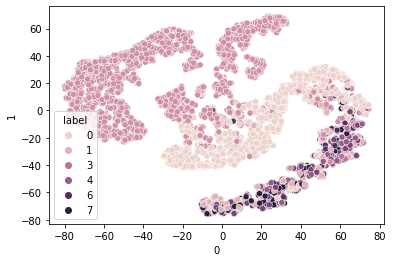

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_transductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## Obtendo embeddings indutivamente

In [ ]:
nodes_of_sampled = set(sampled.nodes())
nodes_of_fullGraph = set(G.nodes())
starting_nodes = list(nodes_of_fullGraph.difference(nodes_of_sampled))

In [ ]:
len(nodes_of_fullGraph) == len(nodes_of_sampled) + len(starting_nodes)

True

In [ ]:
inductive_node_embeddings = dwt.get_inductive_embeddings(G, starting_nodes)
df_embed_inductive = pd.DataFrame.from_dict(inductive_node_embeddings, orient='index')

Random walks - T=0.09s
Walks shape: (76750, 10)


Building X_paths and X_positions:   0%|          | 0/76750 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...


In [ ]:
df_embed_inductive.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-3.758212,-1.485141,3.017645,-3.035958,3.211440,-2.849319,0.341631,2.048233,1.915696,-0.277100,...,-1.106129,-1.289338,-0.785863,-1.015697,-3.236808,-1.865899,-1.573038,2.313668,-0.068933,2.755269
1,-3.786186,-1.362815,2.695202,-3.407101,3.190185,-2.519728,0.695713,1.569613,1.729482,-0.365407,...,-0.646927,-1.131646,-0.931985,-0.970533,-3.154303,-1.641986,-1.313985,2.301528,0.238331,2.480066
10,-0.982857,0.588673,0.050695,-4.376199,1.777852,0.281107,2.950545,-0.623822,-0.654990,-1.047897,...,1.525311,0.041956,-3.106286,1.946305,-2.003887,2.265363,0.114610,2.173830,1.003349,0.293601
12,-1.200110,0.231897,1.906480,-3.828065,2.865625,-0.766202,1.281725,0.960885,0.378435,-1.764297,...,-0.352579,-0.834857,-2.731560,1.637576,-3.544089,1.862200,-1.423171,2.948680,0.781174,1.612068
14,-2.545512,-1.887068,2.303423,-3.320576,2.253863,-2.193135,0.135846,2.314265,1.499136,-0.396124,...,-1.268175,-0.747085,-1.182494,0.428293,-2.625465,0.038875,-1.216587,2.742551,-0.148755,2.287551


In [ ]:
df_embed_inductive.shape

(1535, 32)

In [ ]:
labels = df.iloc[df_embed_inductive.index].label.to_list()
evaluate(df_embed_inductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       149
           1       0.64      0.22      0.33        32
           2       0.66      0.80      0.72       208
           3       0.00      0.00      0.00         3
           4       0.17      0.04      0.07        24
           5       0.00      0.00      0.00        15
           6       1.00      0.25      0.40        12
           7       0.67      0.56      0.61        18

    accuracy                           0.62       461
   macro avg       0.46      0.32      0.34       461
weighted avg       0.59      0.62      0.58       461



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [ ]:
np.sum(df_embed_inductive.index == starting_nodes)

1535

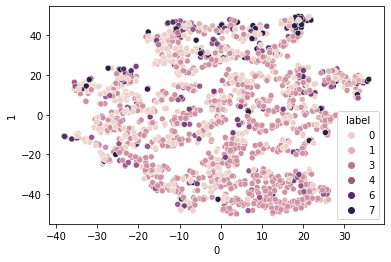

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_inductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## Avaliando conjuntamente

In [ ]:
df_embed = pd.concat([df_embed_transductive, df_embed_inductive])
df_embed.shape

(7674, 32)

In [ ]:
df_embed.head()

(7674, 32)

In [ ]:
labels = df.iloc[df_embed.index].label.to_list()
evaluate(df_embed, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       682
           1       0.47      0.06      0.11       116
           2       0.88      0.89      0.88      1167
           3       0.00      0.00      0.00        18
           4       0.38      0.11      0.17        90
           5       0.00      0.00      0.00        83
           6       0.00      0.00      0.00        48
           7       0.28      0.78      0.41        99

    accuracy                           0.74      2303
   macro avg       0.34      0.34      0.29      2303
weighted avg       0.71      0.74      0.71      2303



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

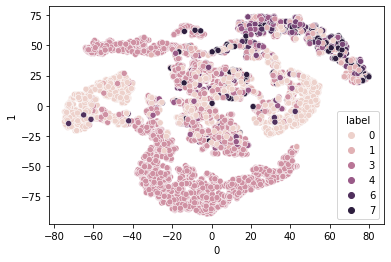

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")